# **xT**

## **Data : SOCCERMENT**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime

# Import packages
from urllib.request import urlopen, Request
# Import packages
import requests
from bs4 import BeautifulSoup


In [2]:
def data(url):
    # Specify the url
    url =str(url)

    # Package the request, send the request and catch the response: r
    r = requests.get(url)

    # Extracts the response as html: html_doc
    html_doc = r.text

    # Create a BeautifulSoup object from the HTML: soup
    soup = BeautifulSoup(html_doc)

    # Prettify the BeautifulSoup object: pretty_soup
    pretty_soup = soup.prettify()

    soup = BeautifulSoup(r.content, 'lxml')

    s1= str(soup)
    string = s1[12200:]
    words = string.split('data-optaid')
    return words

## **xT_P Pass data**

In [3]:
url = ["https://analytics.soccerment.com/en/league/premier_league/players/stat/xT_pass",
                 "https://analytics.soccerment.com/en/league/la_liga/players/stat/xT_pass",
                 "https://analytics.soccerment.com/en/league/serie_a/players/stat/xT_pass",
                 "https://analytics.soccerment.com/en/league/bundesliga/players/stat/xT_pass",
                 "https://analytics.soccerment.com/en/league/ligue_1/players/stat/xT_pass"]

In [7]:
words1 =data(url[0])

name = []
age =[]
xT_p =[]
for x in words1[1:450]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_p.append(a2[2])

col_names = ["name",
"age",
"xT_p"]

df = pd.DataFrame([name,age,
xT_p],index =col_names)

df = df.T

df["xT_p"] =df["xT_p"].astype(float)

test = df
test.loc[len(test.index)] = ['K. Trippier', 32, 2.60] 
test=test.sort_values(["xT_p"], ascending=[False])
test =test.reset_index(drop=True)
test["name"]=test["name"].astype(str)
test["age"]=test["age"].astype(float)

prem = test

n = len(prem)
league = [ "Premier League" for x in range(0,n)]

prem["League"] = league

In [8]:
prem

,name,age,xT_p,League
0,K. Trippier,32.0,2.60,Premier League
1,K. De Bruyne,31.0,2.53,Premier League
2,T. Alexander-Arnold,24.0,2.17,Premier League
3,M. Ødegaard,24.0,1.92,Premier League
4,Bruno Fernandes,28.0,1.81,Premier League
...,...,...,...,...
445,C. Wilson,30.0,-0.03,Premier League
446,J. Lowe,28.0,-0.03,Premier League
447,R. Nelson,22.0,-0.03,Premier League
448,T. Walcott,33.0,-0.03,Premier League


In [9]:
is_NaN = test. isnull()
row_has_NaN = is_NaN. any(axis=1)
test[row_has_NaN]

,name,age,xT_p,League


In [10]:
words2 =data(url[1])
name = []
age =[]
xT_p =[]
for x in words2[1:450]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_p.append(a2[2])
col_names = ["name",
"age",
"xT_p"]

df = pd.DataFrame([name,age,
xT_p],index =col_names)

df = df.T

df["xT_p"] =df["xT_p"].astype(float)

test = df
test.loc[len(test.index)] = ['J. Alba', 33, 1.52] 
test=test.sort_values(["xT_p"], ascending=[False])
test =test.reset_index(drop=True)
test["name"]=test["name"].astype(str)
test["age"]=test["age"].astype(float)
liga = test
n = len(liga)
league = [ "La Liga" for x in range(0,n)]

liga["League"] = league

liga

,name,age,xT_p,League
0,J. Alba,33.0,1.52,La Liga
1,Raphinha,26.0,1.42,La Liga
2,T. Kroos,32.0,1.40,La Liga
3,O. Dembélé,25.0,1.35,La Liga
4,Pedri,20.0,1.31,La Liga
...,...,...,...,...
445,A. Illarramendi,32.0,-0.01,La Liga
446,A. Isak,22.0,-0.01,La Liga
447,V. Fernández,23.0,-0.02,La Liga
448,O. Ureña,19.0,-0.02,La Liga


In [11]:
words3 =data(url[2])
name = []
age =[]
xT_p =[]
for x in words3[1:450]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_p.append(a2[2])
col_names = ["name",
"age",
"xT_p"]

df = pd.DataFrame([name,age,
xT_p],index =col_names)

df = df.T

df["xT_p"] =df["xT_p"].astype(float)

test = df
test.loc[len(test.index)] = ['G. Deulofeu', 28, 2.14] 
test=test.sort_values(["xT_p"], ascending=[False])
test =test.reset_index(drop=True)
test["name"]=test["name"].astype(str)
test["age"]=test["age"].astype(float)
serie = test
n = len(serie)
league = [ "Serie A" for x in range(0,n)]

serie["League"] = league

serie

,name,age,xT_p,League
0,G. Di Lorenzo,29.0,2.18,Serie A
1,G. Deulofeu,28.0,2.14,Serie A
2,G. Deulofeu,28.0,2.14,Serie A
3,T. Koopmeiners,24.0,1.96,Serie A
4,N. Barella,25.0,1.70,Serie A
...,...,...,...,...
445,Emmanuel Ekong,20.0,-0.01,Serie A
446,S. Zurkowski,24.0,-0.02,Serie A
447,L. Ferguson,23.0,-0.02,Serie A
448,Agustín Álvarez Martínez,21.0,-0.02,Serie A


In [12]:
words4 =data(url[3])
name = []
age =[]
xT_p =[]
for x in words4[1:425]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_p.append(a2[2])
col_names = ["name",
"age",
"xT_p"]

df = pd.DataFrame([name,age,
xT_p],index =col_names)

df = df.T

df["xT_p"] =df["xT_p"].astype(float)

test = df
test.loc[len(test.index)] = ['M. Riemann', 28, 1.90] 
test=test.sort_values(["xT_p"], ascending=[False])
test =test.reset_index(drop=True)
test["name"]=test["name"].astype(str)
test["age"]=test["age"].astype(float)
bundes = test
n = len(bundes)
league = [ "Bundesliga" for x in range(0,n)]

bundes["League"] = league

In [13]:
bundes

,name,age,xT_p,League
0,M. Riemann,28.0,1.90,Bundesliga
1,J. Kimmich,27.0,1.84,Bundesliga
2,D. Szoboszlai,22.0,1.79,Bundesliga
3,A. Pléa,29.0,1.65,Bundesliga
4,R. Baku,24.0,1.62,Bundesliga
...,...,...,...,...
420,D. Kyereh,26.0,-0.12,Bundesliga
421,S. Guirassy,26.0,-0.16,Bundesliga
422,T. Siebatcheu,26.0,-0.20,Bundesliga
423,P. Schick,26.0,-0.24,Bundesliga


In [14]:
words5 =data(url[4])
name = []
age =[]
xT_p =[]
for x in words5[1:486]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_p.append(a2[2])
col_names = ["name",
"age",
"xT_p"]

df = pd.DataFrame([name,age,
xT_p],index =col_names)

df = df.T

df["xT_p"] =df["xT_p"].astype(float)

test = df
test.loc[len(test.index)] = ['L. Messi', 35, 3.33] 
test=test.sort_values(["xT_p"], ascending=[False])
test =test.reset_index(drop=True)
test["name"]=test["name"].astype(str)
test["age"]=test["age"].astype(float)
ligue = test
n = len(ligue)
league = [ "Ligue 1" for x in range(0,n)]

ligue["League"] = league

In [15]:
ligue

,name,age,xT_p,League
0,L. Messi,35.0,3.33,Ligue 1
1,Neymar,30.0,2.51,Ligue 1
2,A. Djiku,28.0,1.96,Ligue 1
3,R. Cabella,32.0,1.91,Ligue 1
4,M. Verratti,30.0,1.77,Ligue 1
...,...,...,...,...
481,Nuno da Costa,31.0,-0.17,Ligue 1
482,G. Kyei,27.0,-0.20,Ligue 1
483,T. Moffi,23.0,-0.27,Ligue 1
484,A. Hunou,28.0,-0.28,Ligue 1


In [16]:
ligue[ligue["name"] =='K. Mbappé']

,name,age,xT_p,League
8,K. Mbappé,24.0,1.54,Ligue 1


In [17]:
prem = prem.append([liga,serie,bundes,ligue], ignore_index = True)

In [18]:
prem

,name,age,xT_p,League
0,K. Trippier,32.0,2.60,Premier League
1,K. De Bruyne,31.0,2.53,Premier League
2,T. Alexander-Arnold,24.0,2.17,Premier League
3,M. Ødegaard,24.0,1.92,Premier League
4,Bruno Fernandes,28.0,1.81,Premier League
...,...,...,...,...
2256,Nuno da Costa,31.0,-0.17,Ligue 1
2257,G. Kyei,27.0,-0.20,Ligue 1
2258,T. Moffi,23.0,-0.27,Ligue 1
2259,A. Hunou,28.0,-0.28,Ligue 1


## **xT_Carries**

In [19]:
url1 = ["https://analytics.soccerment.com/en/league/premier_league/players/stat/xT_dribble",
                 "https://analytics.soccerment.com/en/league/la_liga/players/stat/xT_dribble",
                 "https://analytics.soccerment.com/en/league/serie_a/players/stat/xT_dribble",
                 "https://analytics.soccerment.com/en/league/bundesliga/players/stat/xT_dribble",
                 "https://analytics.soccerment.com/en/league/ligue_1/players/stat/xT_dribble"]

In [20]:
words2 =data(url1[0])
name = []
age =[]
xT_C =[]
for x in words2[1:456]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_C.append(a2[2])

col_names = ["name",
"age",
"xT_C"]

df = pd.DataFrame([name,age,
xT_C],index =col_names)

df = df.T

df["xT_C"] =df["xT_C"].astype(float)

test2 = df
test2.loc[len(test2.index)] = ['E. Haaland', 22, 1.26] 
test2=test2.sort_values(["xT_C"], ascending=[False])
test2 =test2.reset_index(drop=True)
test2["name"]=test2["name"].astype(str)
test2["age"]=test2["age"].astype(float)

prem1 = test2
n = len(prem1)
league = [ "Premier League" for x in range(0,n)]

prem1["League"] = league
prem1

,name,age,xT_C,League
0,E. Haaland,22.0,1.26,Premier League
1,Gabriel Jesus,25.0,1.23,Premier League
2,Gabriel Martinelli,21.0,1.17,Premier League
3,W. Zaha,30.0,1.15,Premier League
4,D. Gray,26.0,1.14,Premier League
...,...,...,...,...
451,J. Gomez,25.0,-0.11,Premier League
452,K. Tete,27.0,-0.12,Premier League
453,J. Vardy,35.0,-0.13,Premier League
454,J. Lerma,28.0,-0.17,Premier League


In [21]:
words2 =data(url1[1])
name = []
age =[]
xT_C =[]
for x in words2[1:486]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_C.append(a2[2])

col_names = ["name",
"age",
"xT_C"]

df = pd.DataFrame([name,age,
xT_C],index =col_names)

df = df.T

df["xT_C"] =df["xT_C"].astype(float)

test2 = df
test2.loc[len(test2.index)] = ['Vinícius Júnior', 22, 2.27] 
test2=test2.sort_values(["xT_C"], ascending=[False])
test2 =test2.reset_index(drop=True)
test2["name"]=test2["name"].astype(str)
test2["age"]=test2["age"].astype(float)

liga1 = test2
n = len(liga1)
league = [ "La Liga" for x in range(0,n)]

liga1["League"] = league
liga1

,name,age,xT_C,League
0,Vinícius Júnior,22.0,2.27,La Liga
1,Samuel Lino,23.0,1.16,La Liga
2,O. Dembélé,25.0,1.07,La Liga
3,Rodrygo,21.0,1.05,La Liga
4,Nico Williams,20.0,0.84,La Liga
...,...,...,...,...
481,C. Stuani,36.0,-0.17,La Liga
482,Marcos André,26.0,-0.21,La Liga
483,Kike García,33.0,-0.23,La Liga
484,Isi Palazón,28.0,-0.27,La Liga


In [22]:
words2 =data(url1[2])
name = []
age =[]
xT_C =[]
for x in words2[1:482]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_C.append(a2[2])

col_names = ["name",
"age",
"xT_C"]

df = pd.DataFrame([name,age,
xT_C],index =col_names)

df = df.T

df["xT_C"] =df["xT_C"].astype(float)

test2 = df
test2.loc[len(test2.index)] = ['G. Deulofeu', 22, 1.29] 
test2=test2.sort_values(["xT_C"], ascending=[False])
test2 =test2.reset_index(drop=True)
test2["name"]=test2["name"].astype(str)
test2["age"]=test2["age"].astype(float)

serie1 = test2
n = len(serie1)
league = [ "Serie A" for x in range(0,n)]

serie1["League"] = league
serie1

,name,age,xT_C,League
0,G. Deulofeu,28.0,1.29,Serie A
1,G. Deulofeu,22.0,1.29,Serie A
2,Destiny Udogie,20.0,0.91,Serie A
3,J. Ikoné,24.0,0.83,Serie A
4,N. Vlasic,25.0,0.79,Serie A
...,...,...,...,...
477,J. Kiwior,22.0,-0.09,Serie A
478,I. Radovanovic,34.0,-0.09,Serie A
479,A. Bastoni,23.0,-0.10,Serie A
480,A. Pinamonti,23.0,-0.10,Serie A


In [23]:
words2 =data(url1[3])
name = []
age =[]
xT_C =[]
for x in words2[1:416]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_C.append(a2[2])

col_names = ["name",
"age",
"xT_C"]

df = pd.DataFrame([name,age,
xT_C],index =col_names)

df = df.T

df["xT_C"] =df["xT_C"].astype(float)

test2 = df
test2.loc[len(test2.index)] = ['M. Thuram', 22, 1.49] 
test2=test2.sort_values(["xT_C"], ascending=[False])
test2 =test2.reset_index(drop=True)
test2["name"]=test2["name"].astype(str)
test2["age"]=test2["age"].astype(float)

bundes1 = test2
n = len(bundes1)
league = [ "Bundesliga" for x in range(0,n)]

bundes1["League"] = league
bundes1

,name,age,xT_C,League
0,M. Thuram,22.0,1.49,Bundesliga
1,M. Diaby,23.0,1.35,Bundesliga
2,S. Mané,30.0,1.17,Bundesliga
3,L. Sané,26.0,0.85,Bundesliga
4,J. Frimpong,21.0,0.83,Bundesliga
...,...,...,...,...
411,M. Ginter,28.0,-0.26,Bundesliga
412,M. Kruse,34.0,-0.26,Bundesliga
413,J. Kimmich,27.0,-0.27,Bundesliga
414,Felix Nmecha,22.0,-0.29,Bundesliga


In [24]:
words2 =data(url1[4])
name = []
age =[]
xT_C =[]
for x in words2[1:485]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xT_C.append(a2[2])

col_names = ["name",
"age",
"xT_C"]

df = pd.DataFrame([name,age,
xT_C],index =col_names)

df = df.T

df["xT_C"] =df["xT_C"].astype(float)

test2 = df
test2.loc[len(test2.index)] = ['K. Mbappé', 24, 1.91] 
test2=test2.sort_values(["xT_C"], ascending=[False])
test2 =test2.reset_index(drop=True)
test2["name"]=test2["name"].astype(str)
test2["age"]=test2["age"].astype(float)


ligue1 = test2
n = len(ligue1)
league = [ "Ligue 1" for x in range(0,n)]

ligue1["League"] = league
ligue1

,name,age,xT_C,League
0,K. Mbappé,24.0,1.91,Ligue 1
1,L. Messi,35.0,1.59,Ligue 1
2,A. Gouiri,22.0,1.45,Ligue 1
3,K. Toko Ekambi,30.0,1.10,Ligue 1
4,L. Openda,22.0,1.07,Ligue 1
...,...,...,...,...
480,Habib Diallo,27.0,-0.19,Ligue 1
481,A. Delort,31.0,-0.20,Ligue 1
482,I. Sissoko,25.0,-0.23,Ligue 1
483,L. Assignon,22.0,-0.24,Ligue 1


In [25]:
prem1 = prem1.append([liga1,serie1,bundes1,ligue1], ignore_index = True)

In [26]:
prem1

,name,age,xT_C,League
0,E. Haaland,22.0,1.26,Premier League
1,Gabriel Jesus,25.0,1.23,Premier League
2,Gabriel Martinelli,21.0,1.17,Premier League
3,W. Zaha,30.0,1.15,Premier League
4,D. Gray,26.0,1.14,Premier League
...,...,...,...,...
2320,Habib Diallo,27.0,-0.19,Ligue 1
2321,A. Delort,31.0,-0.20,Ligue 1
2322,I. Sissoko,25.0,-0.23,Ligue 1
2323,L. Assignon,22.0,-0.24,Ligue 1


In [27]:
prem1.sort_values("xT_C")

,name,age,xT_C,League
2324,A. Lacazette,31.0,-0.47,Ligue 1
1839,D. Drexler,32.0,-0.42,Bundesliga
1838,Felix Nmecha,22.0,-0.29,Bundesliga
940,Isi Palazón,28.0,-0.27,La Liga
941,Fede San Emeterio,25.0,-0.27,La Liga
...,...,...,...,...
1842,A. Gouiri,22.0,1.45,Ligue 1
1424,M. Thuram,22.0,1.49,Bundesliga
1841,L. Messi,35.0,1.59,Ligue 1
1840,K. Mbappé,24.0,1.91,Ligue 1


In [28]:
prem.sort_values("xT_p")

,name,age,xT_p,League
2260,K. Andric,27.0,-0.35,Ligue 1
2259,A. Hunou,28.0,-0.28,Ligue 1
2258,T. Moffi,23.0,-0.27,Ligue 1
1774,S. Polter,31.0,-0.25,Bundesliga
1773,P. Schick,26.0,-0.24,Bundesliga
...,...,...,...,...
900,G. Di Lorenzo,29.0,2.18,Serie A
1776,Neymar,30.0,2.51,Ligue 1
1,K. De Bruyne,31.0,2.53,Premier League
0,K. Trippier,32.0,2.60,Premier League


In [29]:
# applying merge with more parameters
test3 = prem.merge(prem1[['xT_C','name','League']],how='inner', left_on=['name','League'], right_on=['name','League'])

In [30]:
test3

,name,age,xT_p,League,xT_C
0,K. Trippier,32.0,2.60,Premier League,0.13
1,K. De Bruyne,31.0,2.53,Premier League,0.81
2,T. Alexander-Arnold,24.0,2.17,Premier League,0.19
3,M. Ødegaard,24.0,1.92,Premier League,0.76
4,Bruno Fernandes,28.0,1.81,Premier League,0.32
...,...,...,...,...,...
2224,Nuno da Costa,31.0,-0.17,Ligue 1,0.24
2225,G. Kyei,27.0,-0.20,Ligue 1,0.51
2226,T. Moffi,23.0,-0.27,Ligue 1,0.44
2227,A. Hunou,28.0,-0.28,Ligue 1,0.00


In [31]:
test3.xT_p.min()

-0.35

In [32]:
test3.xT_p.max()

3.33

In [195]:
test3.sort_values("xT_C")

,name,age,xT_p,League,xT_C
1766,A. Lacazette,31.0,1.22,Ligue 1,-0.47
1397,D. Drexler,32.0,0.65,Bundesliga,-0.42
359,J. Sarmiento,20.0,0.03,Premier League,-0.29
1600,Felix Nmecha,22.0,0.11,Bundesliga,-0.29
726,Isi Palazón,28.0,0.13,La Liga,-0.27
...,...,...,...,...,...
2096,A. Gouiri,22.0,0.07,Ligue 1,1.45
1544,M. Thuram,25.0,0.21,Bundesliga,1.49
1743,L. Messi,35.0,3.33,Ligue 1,1.59
1751,K. Mbappé,24.0,1.54,Ligue 1,1.91


In [196]:
test3.sort_values("xT_p")

,name,age,xT_p,League,xT_C
2234,K. Andric,27.0,-0.35,Ligue 1,-0.02
2233,A. Hunou,28.0,-0.28,Ligue 1,0.00
2232,T. Moffi,23.0,-0.27,Ligue 1,0.44
1742,S. Polter,31.0,-0.25,Bundesliga,0.35
1741,P. Schick,26.0,-0.24,Bundesliga,0.02
...,...,...,...,...,...
2,T. Alexander-Arnold,24.0,2.17,Premier League,0.19
1744,Neymar,30.0,2.51,Ligue 1,0.60
1,K. De Bruyne,31.0,2.53,Premier League,0.81
0,K. Trippier,32.0,2.60,Premier League,0.13


In [33]:
test3 = test3.drop_duplicates()

In [34]:
test3 = test3.reset_index(drop= True)

In [35]:
test3

,name,age,xT_p,League,xT_C
0,K. Trippier,32.0,2.60,Premier League,0.13
1,K. De Bruyne,31.0,2.53,Premier League,0.81
2,T. Alexander-Arnold,24.0,2.17,Premier League,0.19
3,M. Ødegaard,24.0,1.92,Premier League,0.76
4,Bruno Fernandes,28.0,1.81,Premier League,0.32
...,...,...,...,...,...
2219,Nuno da Costa,31.0,-0.17,Ligue 1,0.24
2220,G. Kyei,27.0,-0.20,Ligue 1,0.51
2221,T. Moffi,23.0,-0.27,Ligue 1,0.44
2222,A. Hunou,28.0,-0.28,Ligue 1,0.00


## **Prepping Plot**

## Creating zones

In [36]:
nine = test3.quantile(0.99)
nine

age     36.0000
xT_p     1.5977
xT_C     0.9454
Name: 0.99, dtype: float64

In [37]:
X = nine[1]
Y = nine[2]

### **Green Zone**

In [38]:
green = test3[(test3["xT_p"]> X) & (test3["xT_C"] > Y)]
green_list = list(green.iloc[:,0])
green_list

['G. Deulofeu', 'L. Messi']

In [39]:
green

,name,age,xT_p,League,xT_C
880,G. Deulofeu,28.0,2.14,Serie A,1.29
1734,L. Messi,35.0,3.33,Ligue 1,1.59


## **Red Zone**

In [40]:
red = test3[(test3["xT_p"] < X) & (test3["xT_C"] > Y)]
red = red.sort_values("xT_C",ascending=[False])
red_list = list(red.iloc[0:10,0])


In [41]:
red_list

['Vinícius Júnior',
 'K. Mbappé',
 'M. Thuram',
 'A. Gouiri',
 'M. Diaby',
 'E. Haaland',
 'Gabriel Jesus',
 'Gabriel Martinelli',
 'S. Mané',
 'Samuel Lino']

## **Blue Zone**

In [42]:
blue = test3[(test3["xT_p"] > X) & (test3["xT_C"] < Y)]
blue = blue.sort_values("xT_p",ascending=[False])
blue_list = list(blue.iloc[:10,0])

In [43]:
blue_list

['K. Trippier',
 'K. De Bruyne',
 'Neymar',
 'G. Di Lorenzo',
 'T. Alexander-Arnold',
 'T. Koopmeiners',
 'A. Djiku',
 'M. Ødegaard',
 'R. Cabella',
 'M. Riemann']

# **Creating Plot**`

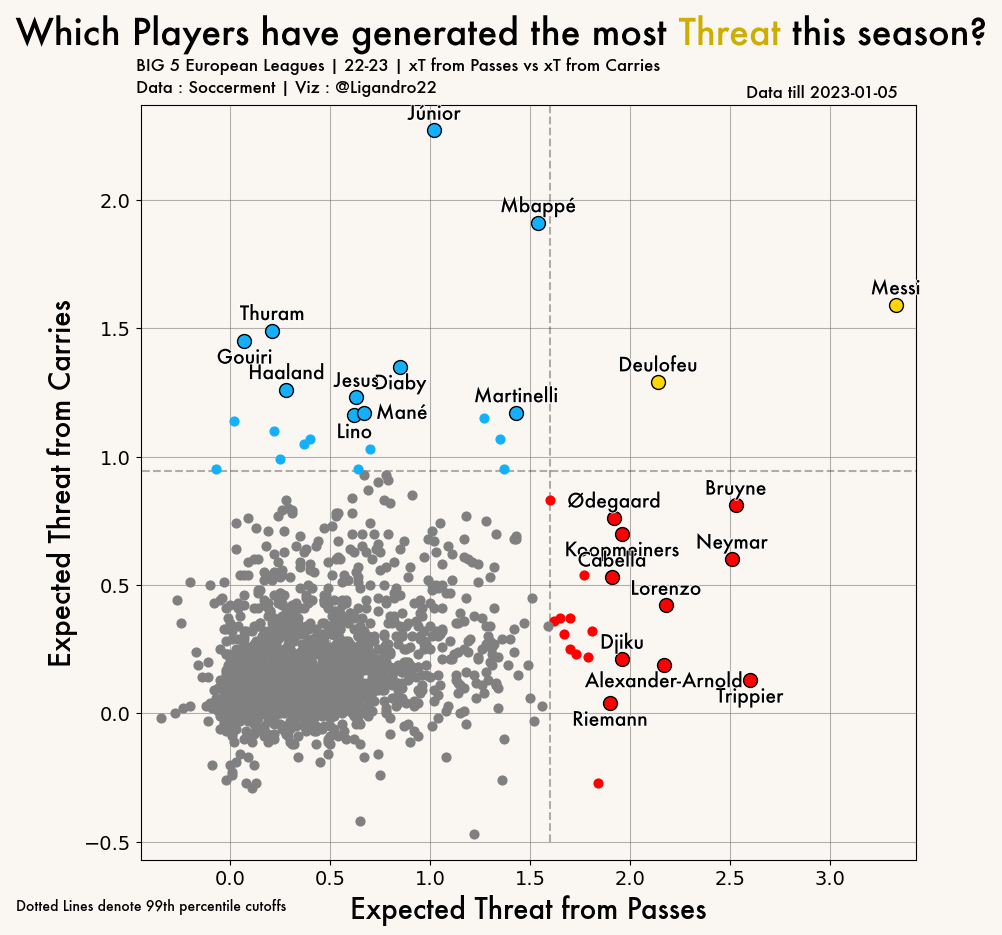

In [44]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = plt.subplot()


ax.set_ylim(test3.xT_C.min()-0.1, test3.xT_C.max()+0.5)
ax.set_xlim(test3.xT_p.min()-0.1,test3.xT_p.max()+0.5)

x = datetime.datetime.now()
x = str(x)
date = x[:10]

f = "Futura"
color1="#FAF7F3"
fig.set_facecolor(color1)
ax.patch.set_facecolor(color1)


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')




# Add spines
ax.spines["left"].set_color('black')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('black')

# Add grid and axis labels
ax.grid(True, color = "grey", ls = "-",alpha=0.6) #ls = linestyle,




plt.ylabel("Expected Threat from Carries",font =f,fontsize = 20,color="black")
plt.xlabel("Expected Threat from Passes",font =f ,fontsize = 20,color= "black")
ax.tick_params(labelsize=14)
          
   


for y,z,n in zip(test3["xT_p"],test3["xT_C"],test3["name"] ): 
    if y < X and z > Y:
        if n in red_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#13B0FE",zorder = 3,ec = "#000000")
        else :
            ax.scatter(y,z,s = 40, alpha = 1,color= "#13B0FE",zorder = 3)
    if z < Y and y>X:
        if n in blue_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#FF0000",zorder = 3,ec = "#000000")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FF0000",zorder = 3)
    if z > Y and y > X:
        if n in green_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#FFD700",zorder = 3,ec = "#000000")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FFD700",zorder = 3)
    if z < Y and y < X:
        ax.scatter(y,z,s = 40, alpha = 1,color= "grey",zorder = 3)


for i,txt in enumerate(green_list):
    t = txt.split(" ")
    n = len(t)
    j = test3.index[test3["name"] == txt ].tolist()
    j = j[0]
    ax.annotate(
        xy = (test3.iloc[j,2], test3.iloc[j,4]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 12),
        textcoords = "offset points",
        weight = "bold",color="black",size =14,fontname=f,fontweight="bold"
        ,path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
    )

    
    

# add text
for i,txt in enumerate(red_list):
    j = test3.index[test3["name"] == txt ].tolist()
    j = j[0]
    t = txt.split(" ")
    n = len(t)
    if txt in ['Vinícius Júnior','K. Mbappé','M. Thuram',
                  'E. Haaland','Gabriel Jesus','Gabriel Martinelli']:
        y_pos = 12
    else:
        y_pos = -12
    if txt in ["S. Mané"]:
        x_pos = 27
        y_pos = 0
    else:
        x_pos = 0
    ax.annotate(
        xy = (test3.iloc[j,2], test3.iloc[j,4]),
        text = t[n-1],
        ha = "center",
        va = "center",
        xytext = (x_pos,y_pos),
        textcoords = "offset points",
        weight = "bold",color="black",size =14,fontname=f,fontweight="bold"
        ,path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
        )
    
for i,txt in enumerate(blue_list):
    t = txt.split(" ")
    n = len(t)
    j = test3.index[test3["name"]== txt ].tolist()
    j = j[0]
    if txt in ['K. De Bruyne','Neymar','G. Di Lorenzo','R. Pereyra',
               'A. Djiku','M. Ødegaard','R. Cabella']:
        y_pos = 12
    else:
        y_pos = -12
    ax.annotate(
        xy = (test3.iloc[j,2], test3.iloc[j,4]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, y_pos),
        textcoords = "offset points",
        weight = "bold",color="black",size =14,fontname=f,fontweight="bold",path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
    )
    
fig_text(
    x = 0, y = .9297, 
    s = 'Which Players have generated the most <Threat> this season?',
    highlight_textprops=[{"color":"#CDAD00", "style":"italic"}],
    fontname ="Futura",path_effects=[path_effects.Stroke(linewidth=1.2, foreground=color1), path_effects.Normal()],
    va = 'bottom', ha = 'left',
    fontsize = 26,  weight = 'bold',color="black"
)


fig.text(
    x = 0.12, y = 0.910, 
    s =  "BIG 5 European Leagues | 22-23 | xT from Passes vs xT from Carries",
    va = 'bottom', ha = 'left',fontname ="Futura",
    fontsize = 12,color ='black'
)



fig.text(
    x = 0.12, y = 0.888, 
    s =  "Data : Soccerment | Viz : @Ligandro22",
    va = 'bottom', ha = 'left',fontname ="Futura",
    fontsize = 12,color ='black'
)

fig.text(
    x = 0.73, y = 0.883, 
    s = 'Data till ' + date,
    va = 'bottom', ha = 'left',
    fontsize = 12, fontname = "Futura",color = 'black'
)

#percentile line
xpoints = [-0.5,12]
ypoints = [Y, Y]

plt.plot(xpoints, ypoints, color = 'black',linestyle = '--',alpha=0.3)

xpoints = [X,  X]
ypoints = [-0.5,8]

plt.plot(xpoints, ypoints, color = 'black',linestyle = '--',alpha=0.3)

fig.text(
    x = 0, y = 0.07, 
    s = "Dotted Lines denote 99th percentile cutoffs",
    va = 'bottom', ha = 'left',
    fontsize = 10, fontname = "Futura",color = 'black'
)


plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')



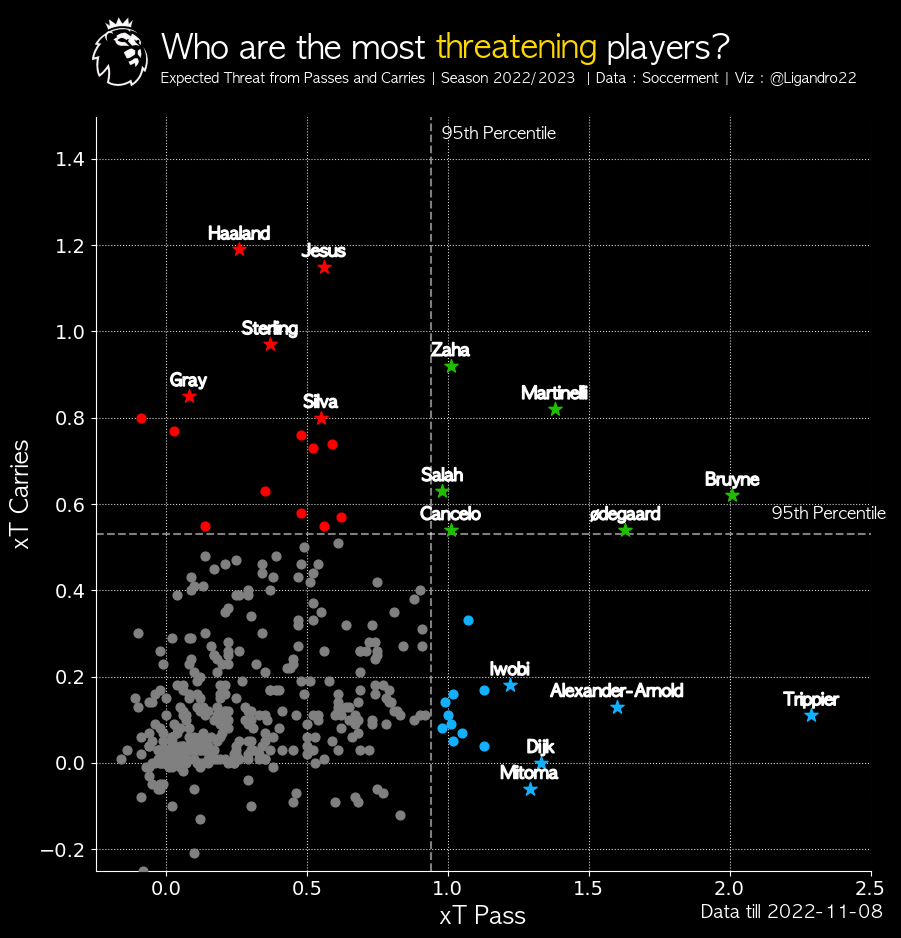

In [204]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = plt.subplot()

ax.set_ylim(-0.25,1.5)
ax.set_xlim(-0.25,2.5)



x = datetime.datetime.now()
x = str(x)
date = x[:10]


fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')




# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":") #ls = linestyle,




plt.xlabel("xT Pass",font ='AppleGothic',fontsize = 17,color="white")
plt.ylabel("xT Carries",font ='AppleGothic',fontsize = 17,color= "white")
ax.tick_params(labelsize=14)

#percentile line
xpoints = [-0.25,2.5]
ypoints = [Y, Y]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--',alpha=0.5)
fig_text(
	x = 0.8, y = Y-0.04, 
    s = "95th Percentile",
    fontsize = 12, fontname = "AppleGothic",color = 'white'
)

xpoints = [X,  X]
ypoints = [-0.25,1.5]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--',alpha=0.5)
fig_text(
	x = 0.47, y = 0.87, 
    s = "95th Percentile",
    fontsize = 12, fontname = "AppleGothic",color = 'white'
)



for y,z,n in zip(test3["xT_p"],test3["xT_C"],test3["name"] ): 
    if y < X and z > Y:
        if n in red_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#FF0000",zorder = 3,marker="*")
        else :
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FF0000",zorder = 3)
    if z < Y and y>X:
        if n in blue_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#13B0FE",zorder = 3,marker="*")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#13B0FE",zorder = 3)
    if z > Y and y > X:
        if n in green_list:
            ax.scatter(y,z,s = 100, alpha = 1,color= "#20BD00",zorder = 3,marker="*")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#20BD00",zorder = 3)
    if z < Y and y < X:
        ax.scatter(y,z,s = 40, alpha = 1,color= "grey",zorder = 3)
                       
     

    
# add text
for i,txt in enumerate(red_list):
    j = test3.index[test3["name"] == txt ].tolist()
    j = j[0]
    t = txt.split(" ")
    n = len(t)
    ax.annotate(
        xy = (test3.iloc[j,2], test3.iloc[j,3]),
        text = t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 11),
        textcoords = "offset points",
        weight = "bold",color="white",size =12,fontname="AppleGothic",fontweight="bold"
        ,path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
        )
        

for i,txt in enumerate(green_list):
    t = txt.split(" ")
    n = len(t)
    j = test3.index[test3["name"] == txt ].tolist()
    j = j[0]
    ax.annotate(
        xy = (test3.iloc[j,2], test3.iloc[j,3]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 11),
        textcoords = "offset points",
        weight = "bold",color="white",size =12,fontname="AppleGothic",fontweight="bold"
        ,path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
    )

for i,txt in enumerate(blue_list):
    t = txt.split(" ")
    n = len(t)
    j = test3.index[test3["name"]== txt ].tolist()
    j = j[0]
    ax.annotate(
        xy = (test3.iloc[j,2], test3.iloc[j,3]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 11),
        textcoords = "offset points",
        weight = "bold",color="white",size =12,fontname="AppleGothic",fontweight="bold",path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
    )
    
    
# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)


# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/PREM.png')
ax_image = add_image(
          im1, fig, left=0.1, bottom=0.892, width=0.1, height=0.1
    )   # these values might differ when you are plotting

fig_text(
	x = 0.19, y = .964, 
    s = "Who are the most <threatening> players?",
    highlight_textprops=[{"color":"gold", "style":"italic"}],
    fontsize = 23, fontname = "AppleGothic",color = 'white'
)
fig.text(
    x = 0.19, y = 0.91, 
    s = 'Expected Threat from Passes and Carries | Season 2022/2023  | Data : Soccerment | Viz : @Ligandro22',
    va = 'bottom', ha = 'left',
    fontsize = 10, fontname = "AppleGothic",color = 'white'
)
fig.text(
    x = 0.73, y = 0.075, 
    s = 'Data till ' + date,
    va = 'bottom', ha = 'left',
    fontsize = 13, fontname = "AppleGothic",color = 'white'
)

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')